In [35]:
%matplotlib notebook
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [4]:
df = pd.read_csv("datasets/weather.csv")
df.head()

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [6]:
days = df[df["MONTH"].isin([1,7]) & (df["DAY"] == 1)].drop(columns="DAY")
days = days.pivot(columns="MONTH", index="TIME")
days.head()

TEMP       PRESSURE       
MONTH    1     7        1      7
TIME                            
1      6.8  16.3    10207  10100
2      5.8  16.5    10214  10099
3      5.7  16.3    10220  10098
4      6.0  16.5    10225  10096
5      4.5  16.7    10230  10098

<IPython.core.display.Javascript object>


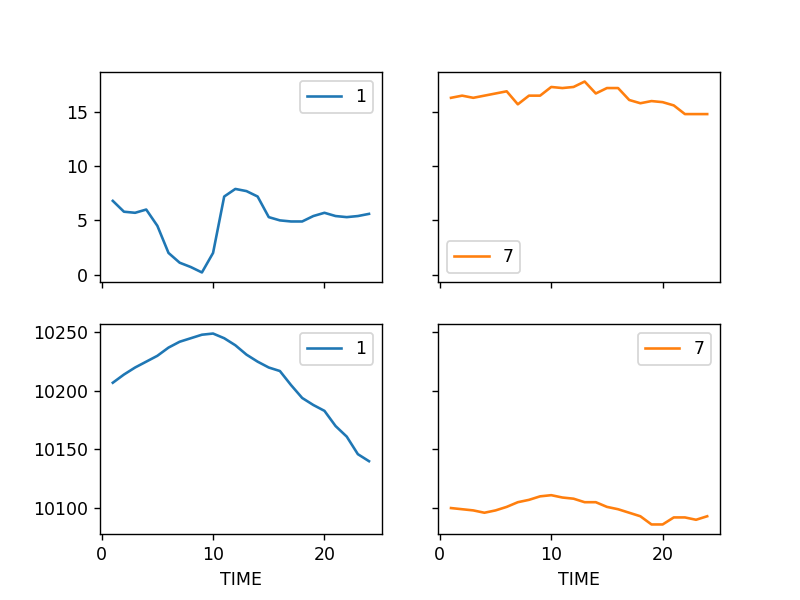

array([<AxesSubplot:xlabel='TIME'>, <AxesSubplot:xlabel='TIME'>],
      dtype=object)

In [12]:
fig, ax = plt.subplots(2,2, sharey="row", sharex="col")
days["TEMP"].plot(subplots=True, ax=ax[0])
days["PRESSURE"].plot(subplots=True, ax=ax[1])

In [14]:
sales_data = pd.read_csv("datasets/sales.csv", parse_dates=["Date"])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     48 non-null     datetime64[ns]
 1   Amount   48 non-null     int64         
 2   Product  48 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ KB


In [15]:
sales_data.head()

,Date,Amount,Product
0,2017-01-20,5411,b
1,2017-02-22,5000,c
2,2017-03-01,7260,a
3,2017-03-14,2117,c
4,2017-04-15,7516,b


In [17]:
sales_data["Month"] = sales_data["Date"].dt.month
df.head()

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [18]:
sales_mp = sales_data.groupby(["Month", "Product"])["Amount"].sum()
sales_mp

Month  Product
1      a           7260
       b           9258
       c           1740
2      a           6534
       c           5000
3      a           7260
       c           2117
4      a          11616
       b          13221
       c           5440
5      a           7119
       c           2990
6      a          11071
7      a           4200
       b          15973
       c           2901
8      a          10342
       c           1590
9      c            660
10     a           2100
       b          10711
       c          14520
11     a           7260
       c           3710
12     a          11616
       b          14800
Name: Amount, dtype: int64

In [67]:
sales_mp = sales_mp.unstack()
revenue = sales_mp.fillna(0).cumsum()
revenue.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

<IPython.core.display.Javascript object>


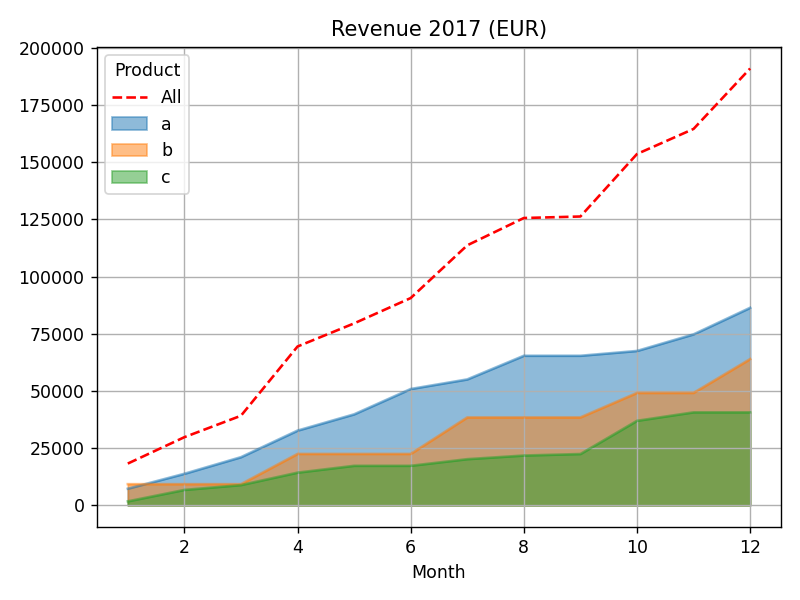

In [26]:
fig, sales_area_plot = plt.subplots()

total_revenue = sales_data.groupby("Month")["Amount"].sum().cumsum()
total_revenue.plot(ax=sales_area_plot, style="r--", legend=True, label="All")
sales_area_plot = revenue.plot.area(title="Revenue 2017 (EUR)", ax=sales_area_plot, stacked=False, grid=True)


fig.tight_layout()

In [29]:
athletes_dataframe = pd.read_csv("datasets/athletes.csv")
athletes_dataframe

,id,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11533,265605954,CUB,female,1995-08-10,1.64,58.0,athletics,0,0,0
11534,214461847,CZE,female,1986-12-19,1.73,63.0,athletics,0,0,0
11535,88361042,CHN,male,1991-05-14,1.85,100.0,wrestling,0,0,0
11536,900065925,VIE,male,1989-04-05,1.60,56.0,weightlifting,0,0,0


In [32]:
top = athletes_dataframe.groupby("nationality")[["gold", "silver", "bronze"]]\
    .sum().sort_values("gold", ascending=False)\
    .head(10)

top

,gold,silver,bronze
nationality,,,
USA,139,54,71
GBR,64,55,26
RUS,52,29,34
GER,49,44,67
CHN,46,30,37
BRA,37,8,6
AUS,23,34,25
ARG,21,1,0
FRA,20,54,21


<IPython.core.display.Javascript object>


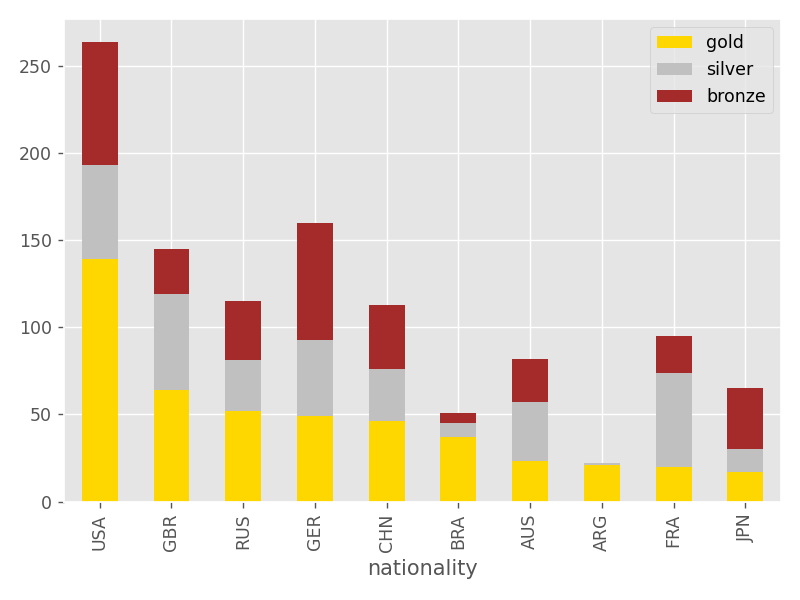

In [36]:
fig, top_athletes = plt.subplots()
top_athletes = top.plot.bar(color=["gold", "silver", "brown"], ax=top_athletes, stacked=True)
fig.tight_layout()

In [37]:
from ipywidgets import interact
import ipywidgets as widgets

In [39]:
def f(x=1, y=2):
    return y*x
interact(f, x=(-5,5), y=(0,10));

interactive(children=(IntSlider(value=1, description='x', max=5, min=-5), IntSlider(value=2, description='y', …

In [41]:
interact(f, x=["john", "mary", "james"], y=(0,10));

interactive(children=(Dropdown(description='x', options=('john', 'mary', 'james'), value='john'), IntSlider(va…

In [44]:
def make_plot(sport1, gender1, sport2, gender2):
    fig, ax = plt.subplots()
    a = athletes_dataframe[(athletes_dataframe["sex"] == gender1) & (athletes_dataframe["sport"] == sport1)]
    b = athletes_dataframe[(athletes_dataframe["sex"] == gender2) & (athletes_dataframe["sport"] == sport2)]
    a.plot.scatter(ax=ax, x="weight", y="height",
                  alpha=.25, color="b", label=sport1 + ", " + gender1)
    b.plot.scatter(ax=ax, x="weight", y="height",
                  alpha=.25, color="r", label=sport2 + ", " + gender2)
    
all_sports = athletes_dataframe["sport"].drop_duplicates().sort_values()
    
interact(make_plot, 
        sport1=all_sports, 
        gender1=["male", "female"],
        sport2=all_sports, 
        gender2=["male", "female"]
    );
    

interactive(children=(Dropdown(description='sport1', options=('aquatics', 'archery', 'athletics', 'badminton',…

In [46]:
medals = athletes_dataframe.groupby(["sport", "nationality"])[["gold", "silver", "bronze"]].sum()
medals.sort_values(["gold"], ascending=False, inplace=True)

In [51]:
def make_plot(n=10, sport="aquatics"):
    fig, ax = plt.subplots(figsize=(n,6))
    top = medals\
        .loc[sport]\
        .head(n)
    top.plot.bar(color=["gold", "silver", "brown"], ax=ax, stacked=True,
                rot=45, title="Top {} countries in {}".format(n, sport))
    ax.set_ylabel('medals')
    
interact(make_plot, 
        n=(5,10), 
        sport=all_sports);

interactive(children=(IntSlider(value=10, description='n', max=10, min=5), Dropdown(description='sport', optio…

In [52]:
import seaborn as sns
sns.set()

In [56]:
athletes = athletes_dataframe[athletes_dataframe["sport"]
                              .isin(["wrestling", "badminton", "triathlon", "gymnastics"])]

<IPython.core.display.Javascript object>


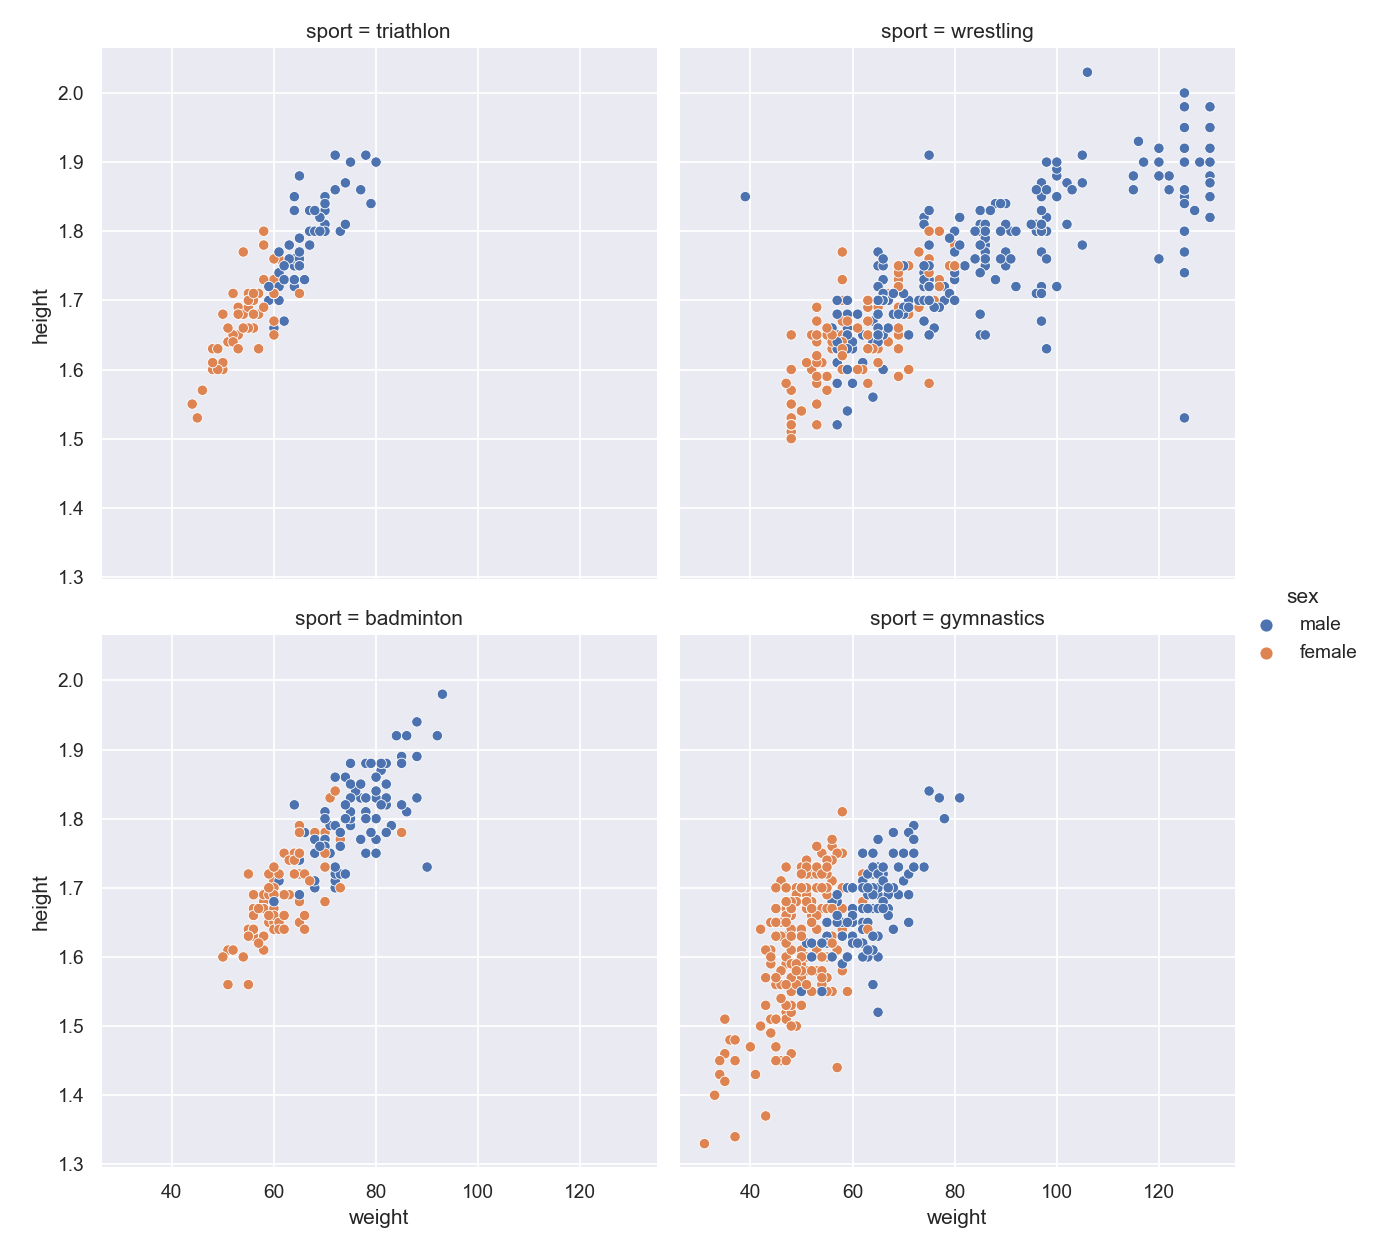

In [58]:
sns.relplot(data=athletes, x="weight", y="height", col="sport", col_wrap=2, hue="sex")

In [59]:
aug = df[df["MONTH"] == 8]
aug.head()

,MONTH,DAY,TIME,TEMP,PRESSURE
5112,8,1,1,13.4,10178
5113,8,1,2,14.4,10176
5114,8,1,3,14.3,10174
5115,8,1,4,14.6,10172
5116,8,1,5,15.6,10172


<IPython.core.display.Javascript object>


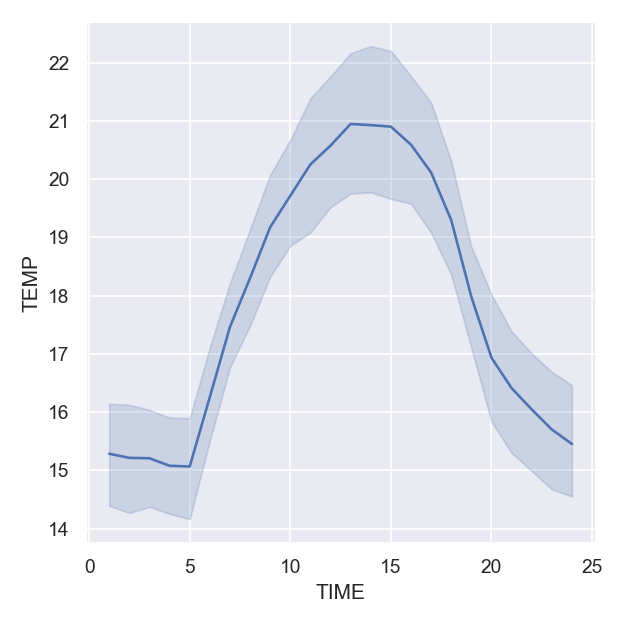

In [60]:
sns.relplot(data=aug, x="TIME", y="TEMP", kind="line")

<IPython.core.display.Javascript object>


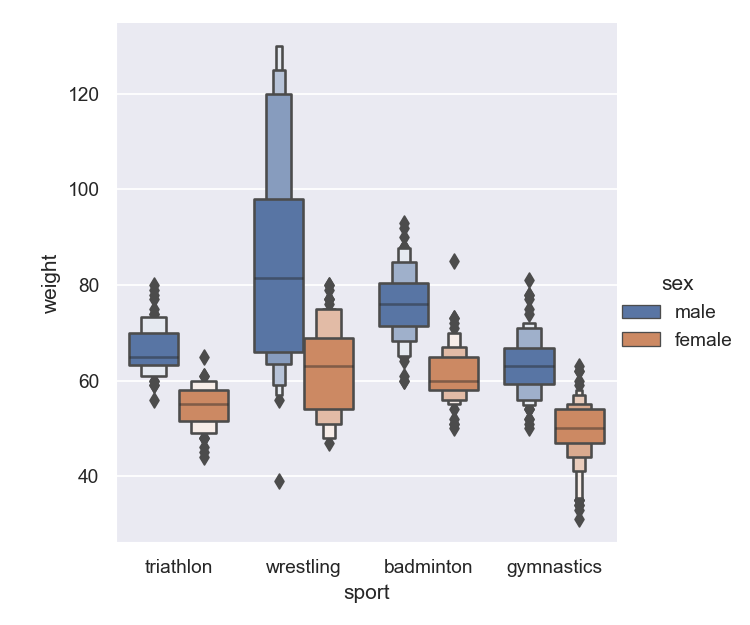

In [62]:
sns.catplot(data=athletes, x="sport", y="weight", hue="sex", kind="boxen");

In [63]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [69]:
sales_data2 = pd.read_csv("datasets/monthly_sales.csv")
sales_data2

,m,a,b,c
0,1,7260.0,9258.0,1740.0
1,2,6534.0,0.0,5000.0
2,3,7260.0,0.0,2117.0
3,4,11616.0,13221.0,5440.0
4,5,7119.0,0.0,2990.0
5,6,11071.0,0.0,0.0
6,7,4200.0,15973.0,2901.0
7,8,10342.0,0.0,1590.0
8,9,0.0,0.0,660.0
9,10,2100.0,10711.0,14520.0


In [71]:
p = figure(title="Monthly Sales (2017)",
          x_axis_label="Month", y_axis_label="Sales (EUR)",
          y_range=(0,20000), plot_width=600, plot_height=400)

p.line(sales_data2["m"], sales_data2["a"], legend="Product A", line_width=2)
p.square(sales_data2["m"], sales_data2["a"], legend="Product A", size=6)

p.line(sales_data2["m"], sales_data2["b"], legend="Product B", color="red")
p.circle(sales_data2["m"], sales_data2["b"], legend="Product B", color="red", size=6)

p.triangle(sales_data2["m"], sales_data2["c"], legend="Product C", color="green", size=8)
p.line(sales_data2["m"], sales_data2["c"], legend="Product C", color="green")

p.legend.location = 'top_left'
show(p)

In [72]:
totals = sales_data2.drop(columns="m").sum()
totals

a    86378.0
b    63963.0
c    40668.0
dtype: float64

In [73]:
p = figure(title="Total Sales",
          x_axis_label="Product",
          x_range=["a", "b", "c"],
          y_axis_label="Sales (EUR)",
          plot_width=500, plot_height=400
          )

p.vbar(x=["a","b","c"], top=totals, width=.5)
show(p)